# Project: Credit Card Fraud Detection + Local Deployment

## Introduction
### 1. understand the dataset
- The dataset contains transactions made by credit cards occurred around two days in September 2013 by European cardholders. 
- Due to confidentiality issues, data haven’t provided background information. There are feature V1, V2, …, V28 obtained with PCA and scaling.
- But only feature “Time”, “Amount” and label “Class (Fraud / Non-Fraud)” they give the original data.
- The dataset has been collected and analyzed during a research collaboration of Worldline and the Machine Learning Group of ULB on big data mining and fraud detection.
- Data from kaggle https://www.kaggle.com/code/janiobachmann/credit-fraud-dealing-with-imbalanced-datasets
### 2. What is my objective?
- Create classification model to classify fraudulent transactions.
- Focus on catch thieves while balance the precision of the model.
### 3. What business get?
- Can implement fraud detection models to prevent credit card fraudulent.
- Catch more thieves and reduce financial damage.

## 0. Set basics library & datasets

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import pickle
df = pd.read_csv(r"C:\Users\User\Desktop\Kaggle\creditcard1.csv")

## 1. Explore data

### 1.1 View data
- We have known that V1 to V28 is PCA and scaling already due to secret information
- Only "Time", "Amount", "Class" aren't PCA and scaling
- Need to scaling these data if using regression based model
- No need to scaling if using tree based model

In [ ]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [9]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

### 1.2 Check NULL or NaN on all columns
- There is no missing value so we don't need to worry
- If data has some NULL, we can drop it out if data isn't many 
- Or using med, mode, mean to replace, or using model to predict that NULL data
- But if it too many NULL, we need to collect new data

In [10]:
df.isnull().sum().max()

np.int64(0)

### 1.3 Check balance of label "Class"
- This is imbalance datasets
- Need to oversampling or undersampling to fix this problem

In [11]:
print('No Frauds', round(df['Class'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('Frauds', round(df['Class'].value_counts()[1]/len(df) * 100,2), '% of the dataset')

No Frauds 99.83 % of the dataset
Frauds 0.17 % of the dataset


## 2. Feature engineering

### 2.1 New feature
- This data "Time" contain 2 days
- Hour = hour of day (1 to 24)
- 1 means (00:00 to 01:00) and (24:00 to 01:00), it continues like this
- Create this feature because I want model to notice the specific time for fraudulent

In [25]:
df['Hour'] = ((df['Time'] % 86400) // 3600) + 1

- Scatter plot of fraud and non-fraud count during day
- There are fraud all the time but we will scope to see more detail

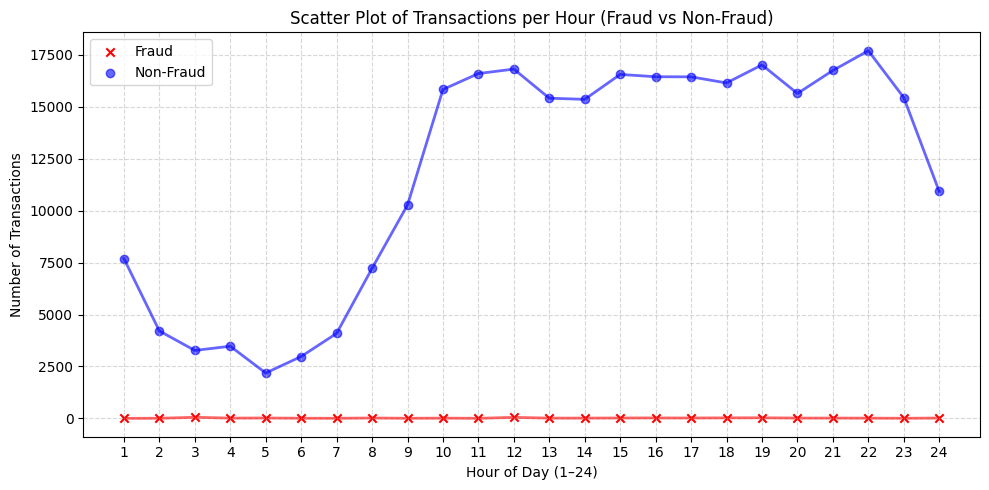

In [13]:
hour_counts = df['Hour'].value_counts().sort_index()
fraud_counts = df[df['Class'] == 1]['Hour'].value_counts().sort_index()
nonfraud_counts = df[df['Class'] == 0]['Hour'].value_counts().sort_index()
plt.figure(figsize=(10, 5))
plt.scatter(fraud_counts.index, fraud_counts.values, label='Fraud', color='red', marker='x')
plt.plot(fraud_counts.index, fraud_counts.values, color='red', linewidth=2, alpha=0.6)
plt.scatter(nonfraud_counts.index, nonfraud_counts.values, label='Non-Fraud', color='blue', alpha=0.6)
plt.plot(nonfraud_counts.index, nonfraud_counts.values, color='blue', linewidth=2, alpha=0.6)
plt.xticks(range(1, 25))
plt.xlabel('Hour of Day (1–24)')
plt.ylabel('Number of Transactions')
plt.title('Scatter Plot of Transactions per Hour (Fraud vs Non-Fraud)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

- Scope only fraud on each hour in a day
- High fraud during 3 am. and 12 am.
- This tell business need to focusing an abnormal volume spike between 03:00 and 12:00.

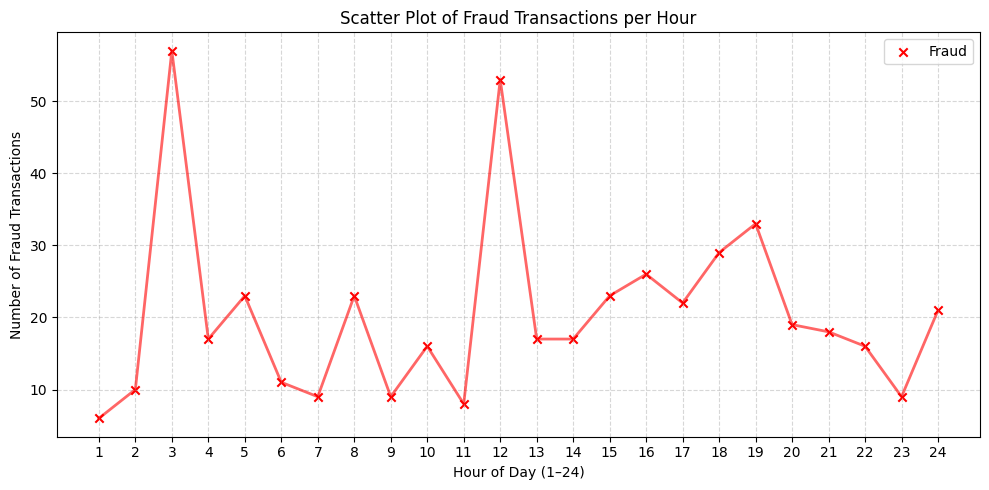

In [14]:
plt.figure(figsize=(10, 5))
plt.scatter(fraud_counts.index, fraud_counts.values, color='red', marker='x', label='Fraud')
plt.plot(fraud_counts.index, fraud_counts.values, color='red', linewidth=2, alpha=0.6)
plt.xticks(range(1, 25))
plt.xlabel('Hour of Day (1–24)')
plt.ylabel('Number of Fraud Transactions')
plt.title('Scatter Plot of Fraud Transactions per Hour')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()

- Scope our financial damage on each hour in a day
- As result, the money lost corresponds to the period with the most fraudulent transaction (03:00 & 12:00)
- But during other periods there was less fraud transacrion, a lot of money was stolen as well (19:00)
- This result tell that not most frequency fraud time is the most damage
- So we need to focusing an abnormal amount spike more on 19:00 too

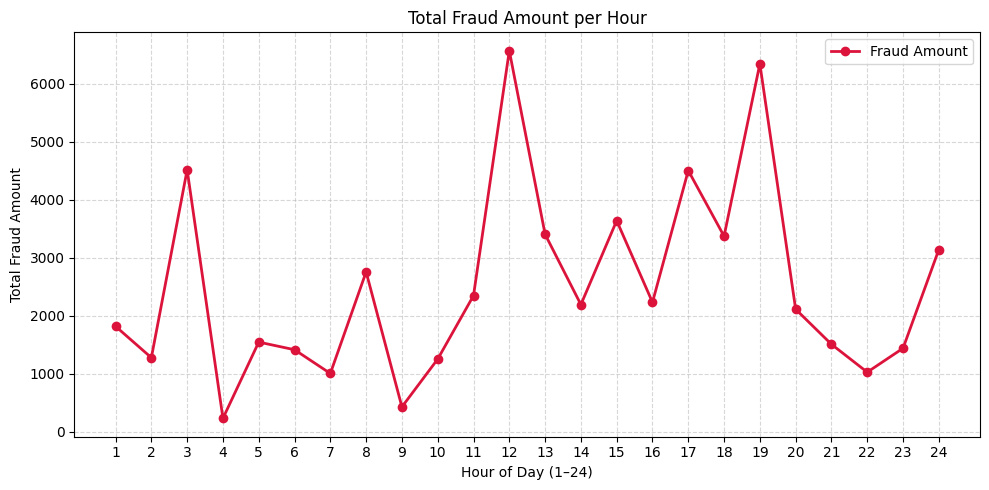

In [15]:
fraud_amount_by_hour = df[df['Class'] == 1].groupby('Hour')['Amount'].sum()
plt.figure(figsize=(10, 5))
plt.plot(fraud_amount_by_hour.index, fraud_amount_by_hour.values, color='crimson', marker='o', linewidth=2, label='Fraud Amount')
plt.xticks(range(1, 25))
plt.xlabel('Hour of Day (1–24)')
plt.ylabel('Total Fraud Amount')
plt.title('Total Fraud Amount per Hour')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()

### 2.2 Scaling data
- Why not use StandScaler or  MinMaxScaler? because there outliner in datasets
- But it can be signal for fraudulent so I using RobustScaler in this case
- Why not use IQR to remove outliner?
- Outliner in this case can be fraudulent so cut it off can lose the signal

In [19]:
from sklearn.preprocessing import RobustScaler
rob_scal = RobustScaler()

- Save for deployment

In [20]:
scaler_hour = RobustScaler()
scaler_amount = RobustScaler()

scaler_hour.fit(df[['Hour']])
scaler_amount.fit(df[['Amount']])

import pickle
scalers = {"Hour": scaler_hour, "Amount": scaler_amount}
with open("rob_scal.pkl", "wb") as f:
    pickle.dump(scalers, f)

- For trainning model

In [21]:
df['scaled_Hour'] = rob_scal.fit_transform(df['Hour'].values.reshape(-1,1))
df['scaled_Amount'] = rob_scal.fit_transform(df['Amount'].values.reshape(-1,1))
df.drop(['Time','Hour','Amount'], axis=1, inplace=True)

### 2.3 Feature selection
- There are 3 common selection: Correlation, Variance, Model selected
- Due to data is PCA so we can't do Correlation, Variance
- Then let the model selected

### 2.4 Split data
- This method is for check model overfit

In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop('Class', axis=1).values
y = df['Class'].values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=77)

## 3. Regression based model

### 3.1 Modeling
#### Four steps I use for regression modeling in this case
#### 1. Logistic regression
- This is basics classification model, easy to explain and powerful
- Adjust parameter to be sensitive to overfit, less complex and time uses
#### 2. Oversampling using SMOTE
- Using SMOTE with 0.5%, 0.75%, 1% of majority, why not 10, 50, 100% of majority?
- Because our fraud data is too small, non-fraud = 99.83%, fraud = 0.17%
- 99.83% / 0.17% = 587 this mean every 587 transaction there will be 1 fraudulent 
- If we scale too much, model will overfit which causes more error
- We should scale around 3 to 5 times of minority which around 0.5% to 1% in this datasets
- Why not undersampling? Because I want model to keep signal of non-fraud
- Undersampling of 280,000, I think this data is crucial to keep for training
#### 3. BayesSearchCV
- Why not gridsearch, randomsearch? Because ourdata is too many
- gridsearch use more time, randomsearch sometime bad random
#### 4. Cross-validation
- Help model to be more actual by using average of many output

In [ ]:
from skopt import BayesSearchCV
from skopt.space import Real, Integer, Categorical
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from sklearn.metrics import classification_report, precision_recall_curve


=== SMOTE Ratio: 0.005 ===
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits


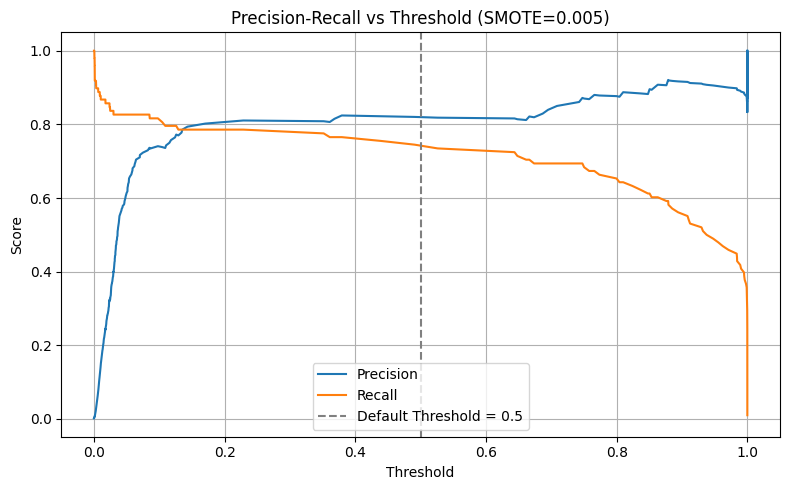


Model: Logistic Regression
Best Params: OrderedDict({'clf__C': 0.3211589756285764, 'clf__class_weight': None})
              precision    recall  f1-score   support

           0     0.9995    0.9997    0.9996     56864
           1     0.8182    0.7347    0.7742        98

    accuracy                         0.9993     56962
   macro avg     0.9089    0.8672    0.8869     56962
weighted avg     0.9992    0.9993    0.9992     56962


=== SMOTE Ratio: 0.0075 ===
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits


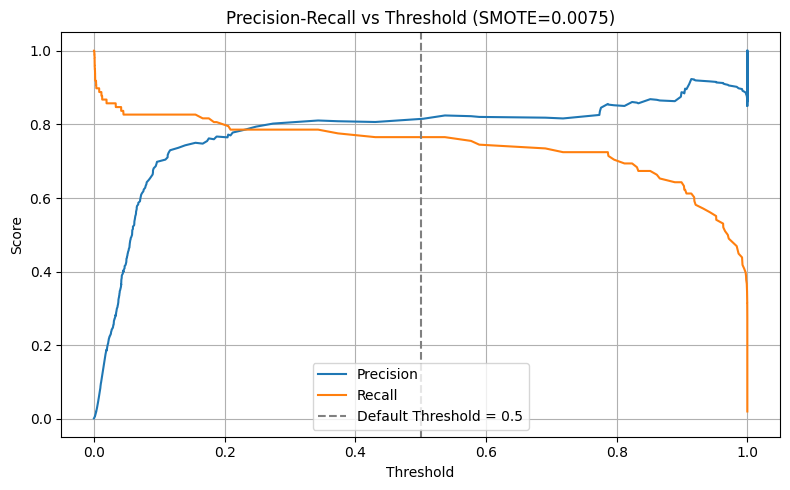


Model: Logistic Regression
Best Params: OrderedDict({'clf__C': 0.3211589756285764, 'clf__class_weight': None})
              precision    recall  f1-score   support

           0     0.9996    0.9997    0.9996     56864
           1     0.8152    0.7653    0.7895        98

    accuracy                         0.9993     56962
   macro avg     0.9074    0.8825    0.8946     56962
weighted avg     0.9993    0.9993    0.9993     56962


=== SMOTE Ratio: 0.01 ===
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits


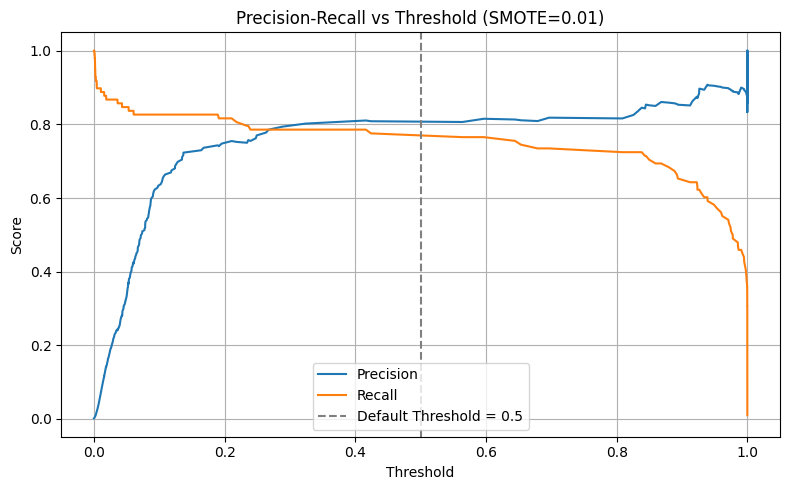


Model: Logistic Regression
Best Params: OrderedDict({'clf__C': 0.14671790296849305, 'clf__class_weight': None})
              precision    recall  f1-score   support

           0     0.9996    0.9997    0.9996     56864
           1     0.8065    0.7653    0.7853        98

    accuracy                         0.9993     56962
   macro avg     0.9030    0.8825    0.8925     56962
weighted avg     0.9993    0.9993    0.9993     56962



In [ ]:
sampling_ratios = [0.005, 0.0075, 0.01]

search_spaces = {
    "Logistic Regression": {
        'clf__C': Real(0.1, 1, prior='log-uniform'),
        'clf__class_weight': Categorical([None])
    }
}

model_constructors = {
    "Logistic Regression": LogisticRegression(
        solver='liblinear', 
        penalty='l1')
}

for ratio in sampling_ratios:
    print(f"\n=== SMOTE Ratio: {ratio} ===")
    smote = SMOTE(sampling_strategy=ratio, random_state=77)

    for name, base_model in model_constructors.items():
        pipe = Pipeline([
            ('smote', smote),
            ('clf', base_model)
        ])

        search = BayesSearchCV(
            estimator=pipe,
            search_spaces=search_spaces[name],
            n_iter=5,
            scoring='f1',
            cv=5,
            verbose=1,
            n_jobs=-1,
            random_state=77,
            error_score='raise'
        )

        search.fit(X_train, y_train)
        best_model = search.best_estimator_
        y_scores = best_model.predict_proba(X_test)[:, 1]
        precisions, recalls, thresholds = precision_recall_curve(y_test, y_scores)

        plt.figure(figsize=(8, 5))
        plt.plot(thresholds, precisions[:-1], label='Precision')
        plt.plot(thresholds, recalls[:-1], label='Recall')
        plt.xlabel('Threshold')
        plt.ylabel('Score')
        plt.title(f'Precision-Recall vs Threshold (SMOTE={ratio})')
        plt.axvline(x=0.5, color='gray', linestyle='--', label='Default Threshold = 0.5')
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.show()

        y_pred = (y_scores >= 0.5).astype(int)
        print(f"\nModel: {name}")
        print("Best Params:", search.best_params_)
        print(classification_report(y_test, y_pred, digits=4, zero_division=0))

### 3.2 Choose SMOTE 0.005 & Adjust Threashold
- As result from 3.1, if we adjust threshold to the best point (f1-score or intersection of lines)
- All result seems the same result, but I choose SMOTE 0.5% to similar with original data
- But my goal is to detect more theives but not distrust more innocent people
- So I need to get more recall by decrease more precision

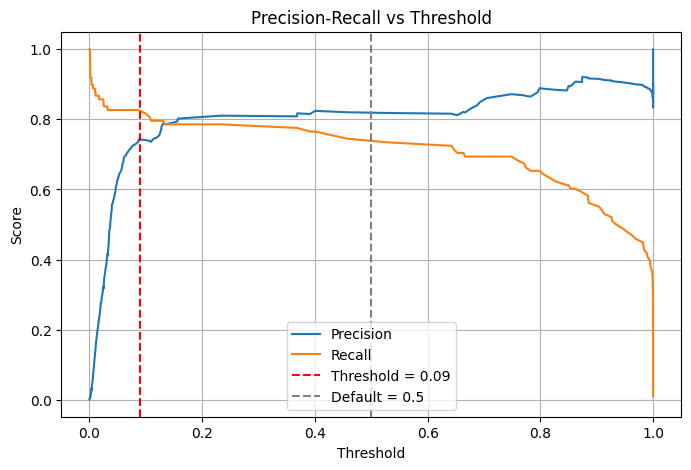

=== Logistic Regression Results ===
SMOTE Ratio: 0.005, Threshold: 0.09
Params: C=0.3211589756285764, class_weight=None, solver='liblinear'
              precision    recall  f1-score   support

           0     0.9997    0.9995    0.9996     56864
           1     0.7407    0.8163    0.7767        98

    accuracy                         0.9992     56962
   macro avg     0.8702    0.9079    0.8881     56962
weighted avg     0.9992    0.9992    0.9992     56962



In [ ]:
sampling_ratio = 0.005
threshold = 0.09
model = LogisticRegression(solver='liblinear', C=0.3211589756285764, class_weight=None)

pipe = Pipeline([
    ('smote', SMOTE(sampling_strategy=sampling_ratio, random_state=77)),
    ('clf', model)
])
pipe.fit(X_train, y_train)

y_scores = pipe.predict_proba(X_test)[:, 1]
y_pred = (y_scores >= threshold).astype(int)

precisions, recalls, thresholds = precision_recall_curve(y_test, y_scores)
plt.figure(figsize=(8, 5))
plt.plot(thresholds, precisions[:-1], label='Precision')
plt.plot(thresholds, recalls[:-1], label='Recall')
plt.axvline(x=threshold, color='red', linestyle='--', label=f'Threshold = {threshold}')
plt.axvline(x=0.5, color='gray', linestyle='--', label='Default = 0.5')
plt.title('Precision-Recall vs Threshold')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.legend()
plt.grid(True)
plt.show()

print("=== Logistic Regression Results ===")
print(f"SMOTE Ratio: {sampling_ratio}, Threshold: {threshold}")
print("Params: C=0.3211589756285764, class_weight=None, solver='liblinear'")
print(classification_report(y_test, y_pred, digits=4, zero_division=0))

### 3.3 Weight of feature
- Positive (+) = tent to fraud, increase probability of fraud
- Negative (-) = tend to non-fraud, decrease probability of fraud
- Due to data is PCA to hide blackground information, Model detect
- Feature V4 most tend to be thieves while V10, V14 most tend to be innocent.

In [ ]:
coefficients = pipe.named_steps['clf'].coef_[0]
intercept = pipe.named_steps['clf'].intercept_[0]
feature_names = df.drop('Class', axis=1).columns

coef_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
})

coef_df = coef_df.sort_values(by='Coefficient', ascending=False)
coef_df = coef_df.reindex(coef_df['Coefficient'].abs().sort_values(ascending=False).index)

print(coef_df.to_string(index=False))
print(f"\nIntercept (β₀): {intercept:.4f}")

      Feature  Coefficient
           V4     0.650651
          V10    -0.612510
          V14    -0.609983
          V22     0.461701
          V27    -0.402182
          V13    -0.309349
          V21     0.294832
          V20    -0.251294
          V16    -0.242859
          V12    -0.187904
           V8    -0.177850
          V11     0.166507
          V26    -0.159456
           V9    -0.151494
          V23    -0.144555
          V28    -0.142373
          V24     0.141881
  scaled_Hour     0.118515
          V25     0.084901
          V15    -0.072390
           V6    -0.069901
           V5     0.069756
          V18    -0.065027
           V3     0.063969
           V1     0.060819
           V7    -0.055498
          V19    -0.047602
          V17    -0.028829
scaled_Amount     0.028374
           V2    -0.000209

Intercept (β₀): -7.5377


### 3.4 ROC-AUC
- This curve tell about how much model classify the fraud and non-fraud
- AUC more than 90% is great!

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

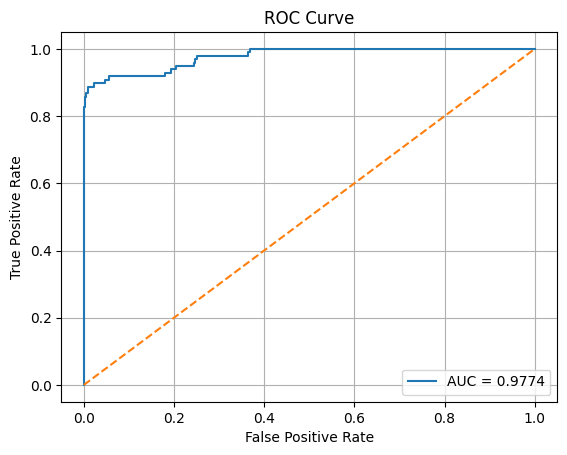

In [ ]:
fpr, tpr, _ = roc_curve(y_test, y_scores)
auc = roc_auc_score(y_test, y_scores)

plt.plot(fpr, tpr, label=f"AUC = {auc:.4f}")
plt.plot([0,1], [0,1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid(True)
plt.show()

### 3.5 Confusion Matrix
- 56,836 (True Negative) The model predicted that it was not a fraud and it was not = Correct
- 28 (False Positive) The model predicted that it was a fraud but it was not = Costing time 
- 18 (False Negative) The model predicted that it was not a fraud but it was actually a fraud = Very risky
- 80 (True Positive) The model predicted that it was a fraud and it was = Our goal!

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

<Figure size 600x500 with 0 Axes>

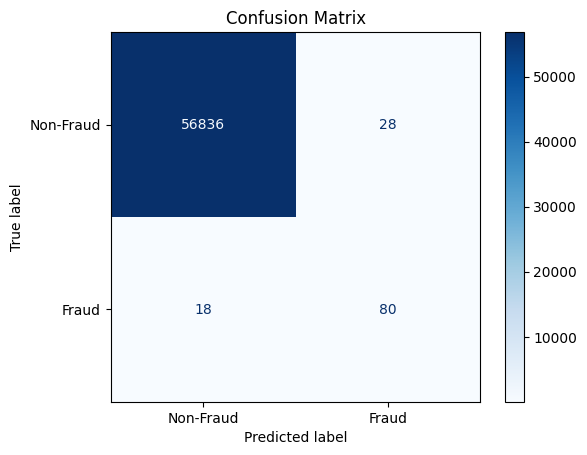

In [ ]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Non-Fraud", "Fraud"])

plt.figure(figsize=(6, 5))
disp.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix")
plt.grid(False)
plt.show()

### 3.6 Precison Recall
- Recall tells us how many thieves we have caught
- Precision tells us how many of the thieves we have caught are actually thieves
- If Recall is low = we let thieves get away, if Precision is low = we are harassing innocent people
- In my case, I choose to get higher recall which make precision to be lower
- This means my model harrass more innocent but caught more thieves
- It up to you what you want more, but mostly in fraud detection case it need to caught the thieves
- Model: Caught theives 81.63%, Predict theives correct 74.07% 

In [ ]:
print("=== Logistic Regression Results ===")
print(f"SMOTE Ratio: {sampling_ratio}, Threshold: {threshold}")
print("Params: C=0.3211589756285764, class_weight=None, solver='liblinear'")
print(classification_report(y_test, y_pred, digits=4, zero_division=0))

=== Logistic Regression Results ===
SMOTE Ratio: 0.005, Threshold: 0.09
Params: C=0.3211589756285764, class_weight=None, solver='liblinear'
              precision    recall  f1-score   support

           0     0.9997    0.9995    0.9996     56864
           1     0.7407    0.8163    0.7767        98

    accuracy                         0.9992     56962
   macro avg     0.8702    0.9079    0.8881     56962
weighted avg     0.9992    0.9992    0.9992     56962



## 4. Tree based model

### 4.1 Modeling
#### Four steps I use for tree modeling in this case
#### 1. XGBoost model
- Better performance than decision tree, random forest but take more time and hard to explain
- Due to my goal to catch theives, I want model with best performance
#### 2. Oversampling using SMOTE
- Same reason as logistic regression I talk earier
#### 3. BayesSearch
- Same reason as logistic regression I talk earier
#### 4. Cross-Validation
- Same reason as logistic regression I talk earier

In [ ]:
from xgboost import XGBClassifier

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi

c:\Users\User\Desktop\Git-Github\.venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [16:03:51] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Best Parameters: OrderedDict({'xgb__colsample_bytree': 1.0, 'xgb__learning_rate': 0.1, 'xgb__max_depth': 5, 'xgb__n_estimators': 300, 'xgb__subsample': 1.0})
              precision    recall  f1-score   support

           0     0.9997    0.9999    0.9998     56864
           1     0.9080    0.8061    0.8541        98

    accuracy                         0.9995     56962
   macro avg     0.9539    0.9030    0.9269     56962
weighted avg     0.9995    0.9995    0.9995     56962



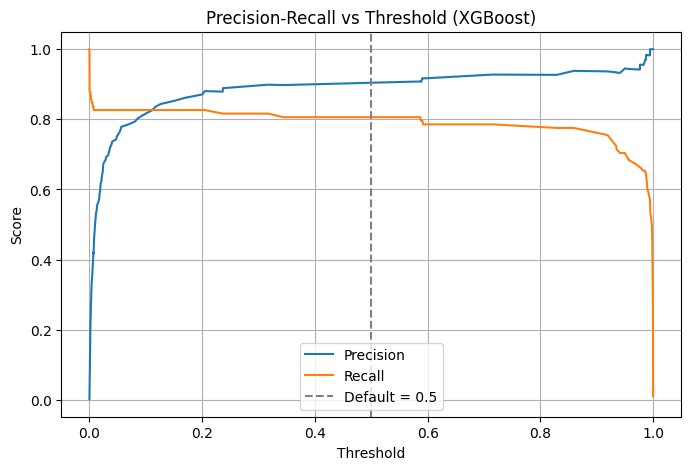

In [ ]:
pipeline = Pipeline([
    ('smote', SMOTE(sampling_strategy = 0.005 ,random_state=77)),
    ('xgb', XGBClassifier(use_label_encoder=False, eval_metric='logloss'))
])

search_spaces = {
    'xgb__max_depth': Integer(5, 10),
    'xgb__learning_rate': Real(0.01, 0.1, prior='log-uniform'),
    'xgb__n_estimators': Integer(50, 300),
    'xgb__subsample': Real(0.5, 1.0, prior='uniform'),
    'xgb__colsample_bytree': Real(0.5, 1.0, prior='uniform'),
}

opt = BayesSearchCV(
    estimator=pipeline,
    search_spaces=search_spaces,
    n_iter=30,
    cv=5,
    verbose=1,
    scoring='f1',
    n_jobs=-1,
    random_state=77
)

opt.fit(X_train, y_train)
best_model = opt.best_estimator_
y_scores = best_model.predict_proba(X_test)[:, 1]
y_pred = (y_scores >= 0.5).astype(int)
precisions, recalls, thresholds = precision_recall_curve(y_test, y_scores)
print("Best Parameters:", opt.best_params_)
print(classification_report(y_test, y_pred, digits=4))
plt.figure(figsize=(8, 5))
plt.plot(thresholds, precisions[:-1], label='Precision')
plt.plot(thresholds, recalls[:-1], label='Recall')
plt.axvline(x=0.5, linestyle='--', color='gray', label='Default = 0.5')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Precision-Recall vs Threshold (XGBoost)')
plt.legend()
plt.grid(True)
plt.show()

### 4.2 Adjust threshold
- As result from 4.1, XGBoost is better than logistic regression
- Recall is similar but Precision is higher
- Remember my goal is to catch more theives while balancing precision
- From graph we can decrease precision and increase recall by set threshold around 0.2
- This make precision decrease, but more recall

== Evaluation at Threshold = 0.2 ==
              precision    recall  f1-score   support

           0     0.9997    0.9998    0.9997     56864
           1     0.8710    0.8265    0.8482        98

    accuracy                         0.9995     56962
   macro avg     0.9353    0.9132    0.9240     56962
weighted avg     0.9995    0.9995    0.9995     56962



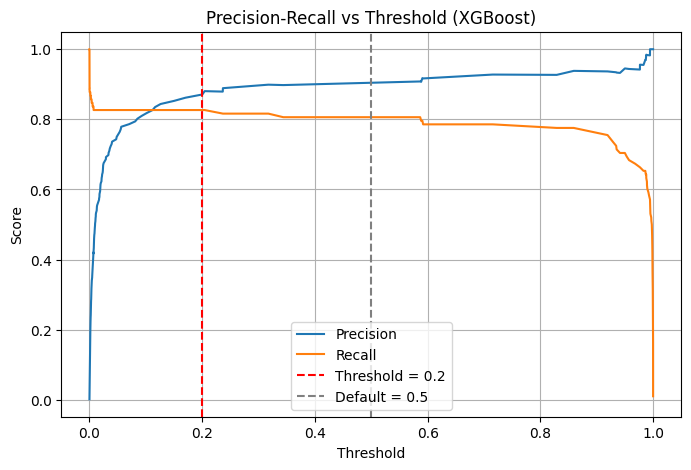

In [ ]:
threshold = 0.2
y_pred = (y_scores >= threshold).astype(int)
precisions, recalls, thresholds = precision_recall_curve(y_test, y_scores)

print(f"== Evaluation at Threshold = {threshold} ==")
print(classification_report(y_test, y_pred, digits=4))
plt.figure(figsize=(8, 5))
plt.plot(thresholds, precisions[:-1], label='Precision')
plt.plot(thresholds, recalls[:-1], label='Recall')
plt.axvline(x=0.2, color='red', linestyle='--', label='Threshold = 0.2')
plt.axvline(x=0.5, color='gray', linestyle='--', label='Default = 0.5')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Precision-Recall vs Threshold (XGBoost)')
plt.legend()
plt.grid(True)
plt.show()

### 4.3 ROC-AUC
- This tell us how much model classify fraud and non-fraud
- AUC more than 90% is great!

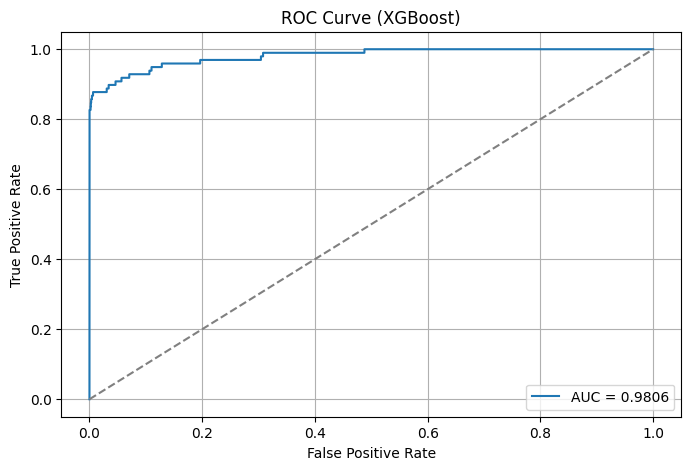

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
auc = roc_auc_score(y_test, y_scores)

plt.figure(figsize=(8, 5))
plt.plot(fpr, tpr, label=f'AUC = {auc:.4f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (XGBoost)')
plt.legend()
plt.grid(True)
plt.show()

### 4.4 Feature important
- As result, V17 is the best feature that decrease the loss of prediction
- This turn our precision to be higher than logistic regression

In [ ]:
from xgboost import plot_importance

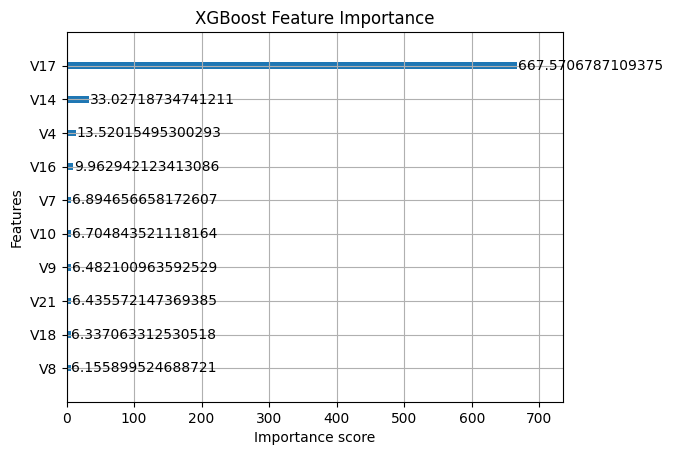

In [ ]:
feature_names = df.drop('Class', axis=1).columns
best_model.named_steps['xgb'].get_booster().feature_names = list(feature_names)
plot_importance(best_model.named_steps['xgb'], importance_type='gain', max_num_features=10)
plt.title("XGBoost Feature Importance")
plt.show()

- As result, V14 & scaled_Amount are the most frequency uses
- This tell how much feature is crucial for prediction

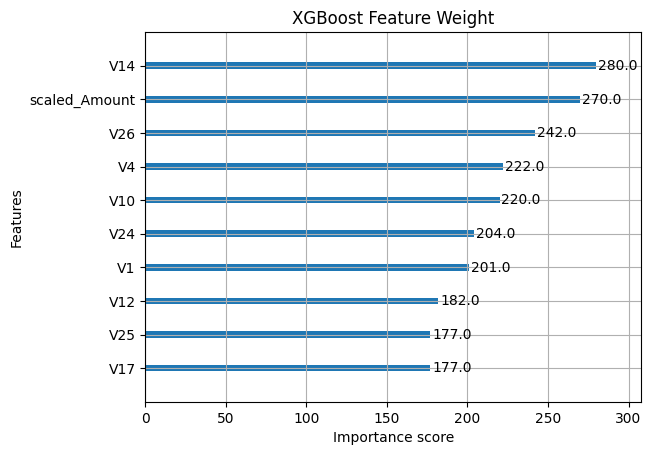

In [ ]:
plot_importance(best_model.named_steps['xgb'], importance_type='weight', max_num_features=10)
plt.title("XGBoost Feature Weight")
plt.show()

### 4.5 Confusion Matrix
- 56,852 (True Negative) The model predicted that it was not a fraud and it was not = Correct
- 12 (False Positive) The model predicted that it was a fraud but it was not = Costing time
- 17 (False Negative) The model predicted that it was not a fraud but it was actually a fraud = Very risky
- 81 (True Positive) The model predicted that it was a fraud and it was = Our goal!

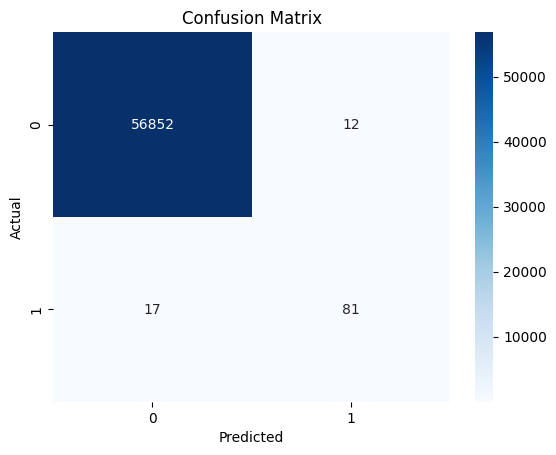

In [ ]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

### 4.6 Precision Recall
- Recall = how many theives we caught
- Precision = how many thieves we have caught are actually thieves
- We catch 82.65% of theives
- Model: Caught theives 82.65%, Predict theives correct 87.10%

In [ ]:
print(f"== Evaluation at Threshold = {threshold} ==")
print(classification_report(y_test, y_pred, digits=4))

== Evaluation at Threshold = 0.2 ==
              precision    recall  f1-score   support

           0     0.9997    0.9998    0.9997     56864
           1     0.8710    0.8265    0.8482        98

    accuracy                         0.9995     56962
   macro avg     0.9353    0.9132    0.9240     56962
weighted avg     0.9995    0.9995    0.9995     56962



## 5. Artificial Neural Network

### 5.1 Using GPU for modeling
- GPU calculate parallel better than CPU
- This suitable with Neural Network, cost less time to train

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from torch.optim.lr_scheduler import StepLR

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print("Number of GPU:", torch.cuda.device_count())
print("Using device:", device)

Number of GPU: 1
Using device: cuda


### 5.2 SMOTE & Set random & Change data type
- ANN model has many epoch so I need to use big batch_size to have enough fraud data in one iteration
- This batch_size help ANN detect fraud in one iteration
- I use SMOTE = 0.005 same reason as earier model

In [ ]:
smote = SMOTE(sampling_strategy=0.005, random_state=77)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

In [ ]:
X_tensor = torch.tensor(X_resampled, dtype=torch.float32).to(device)
y_tensor = torch.tensor(y_resampled, dtype=torch.float32).unsqueeze(1).to(device)

train_dataset = TensorDataset(X_tensor, y_tensor)
train_loader = DataLoader(train_dataset, batch_size=2048, shuffle=True)

### 5.3 Modeling

#### Setup Model
#### Six steps I use for modeling Neural Network in this case
#### 1. ANN
- ANN is good with big feature, big datasets and complex data
- I use only 2 hidden layer for not overfit
#### 2. SMOTE
- Same reason as earier model
#### 3. Batch-Normal
- Make each layer see input values ​​that are distributed almost the same all the time, making training easy and stable.
#### 4. Dropout
- During train, this will drop some neuron out to decrease overfitting
#### 5. Weight on fraud
- Let model focus more on fraud
#### 6. Early Stopping
- Training sometimes not help improving model, this stop model for useless training

In [ ]:
class ANN(nn.Module):
    def __init__(self, input_size):
        super().__init__()
        self.fc1 = nn.Linear(input_size, 32)
        self.bn1 = nn.BatchNorm1d(32)
        self.relu1 = nn.ReLU()
        self.drop1 = nn.Dropout(0.3)

        self.fc2 = nn.Linear(32, 16)
        self.bn2 = nn.BatchNorm1d(16)
        self.relu2 = nn.ReLU()
        self.drop2 = nn.Dropout(0.3)

        self.fc3 = nn.Linear(16, 1)
        self.out = nn.Sigmoid()

    def forward(self, x):
        x = self.drop1(self.relu1(self.bn1(self.fc1(x))))
        x = self.drop2(self.relu2(self.bn2(self.fc2(x))))
        return self.out(self.fc3(x))

model = ANN(input_size=X_tensor.shape[1]).to(device)

#### Setup Loss Function

In [ ]:
fraud_weight = (y_tensor == 0).sum() / (y_tensor == 1).sum()
criterion = nn.BCELoss(weight=torch.tensor([fraud_weight]).to(device))
optimizer = optim.Adam(model.parameters(), lr=0.001)
scheduler = StepLR(optimizer, step_size=10, gamma=0.8)

#### Setup Early Stoping

In [ ]:
best_loss = float('inf')
patience = 5
wait = 0

#### Training Step

In [ ]:
epochs = 50
losses = []
model.train()
for epoch in range(epochs):
    total_loss = 0
    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        y_pred = model(X_batch)
        loss = criterion(y_pred, y_batch)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()

    scheduler.step()
    losses.append(total_loss)
    print(f"Epoch {epoch+1}/{epochs}, Loss: {total_loss:.4f}")

    if total_loss < best_loss:
        best_loss = total_loss
        wait = 0
        best_model_state = model.state_dict()
    else:
        wait += 1
        if wait >= patience:
            print("Early stopping triggered.")
            break

model.load_state_dict(best_model_state)

Epoch 1/50, Loss: 9552.3601
Epoch 2/50, Loss: 4315.3373
Epoch 3/50, Loss: 2216.8231
Epoch 4/50, Loss: 1305.9485
Epoch 5/50, Loss: 868.5182
Epoch 6/50, Loss: 633.3125
Epoch 7/50, Loss: 499.9638
Epoch 8/50, Loss: 417.5681
Epoch 9/50, Loss: 354.3353
Epoch 10/50, Loss: 326.8959
Epoch 11/50, Loss: 301.9847
Epoch 12/50, Loss: 286.3314
Epoch 13/50, Loss: 265.8673
Epoch 14/50, Loss: 263.5539
Epoch 15/50, Loss: 248.6773
Epoch 16/50, Loss: 235.8012
Epoch 17/50, Loss: 235.4351
Epoch 18/50, Loss: 233.4295
Epoch 19/50, Loss: 215.8487
Epoch 20/50, Loss: 214.3368
Epoch 21/50, Loss: 212.6674
Epoch 22/50, Loss: 209.0347
Epoch 23/50, Loss: 203.5512
Epoch 24/50, Loss: 203.3363
Epoch 25/50, Loss: 190.8267
Epoch 26/50, Loss: 194.2223
Epoch 27/50, Loss: 192.3304
Epoch 28/50, Loss: 189.2926
Epoch 29/50, Loss: 186.5534
Epoch 30/50, Loss: 185.4131
Epoch 31/50, Loss: 182.2899
Epoch 32/50, Loss: 177.0989
Epoch 33/50, Loss: 178.4057
Epoch 34/50, Loss: 178.8564
Epoch 35/50, Loss: 173.8797
Epoch 36/50, Loss: 173.41

<All keys matched successfully>

### 5.4 Adjust threshold
- From 5.3, loss is not swing and coverage to zero, this result is well perform
- ROC-AUC more than 90% is great!
- As we see on graph, if I adjust threshold around 0.3, recall will be better while balancing precision


=== Classification Report ===
              precision    recall  f1-score   support

         0.0     0.9996    0.9998    0.9997     56864
         1.0     0.8636    0.7755    0.8172        98

    accuracy                         0.9994     56962
   macro avg     0.9316    0.8876    0.9085     56962
weighted avg     0.9994    0.9994    0.9994     56962

ROC-AUC: 0.989432358480815


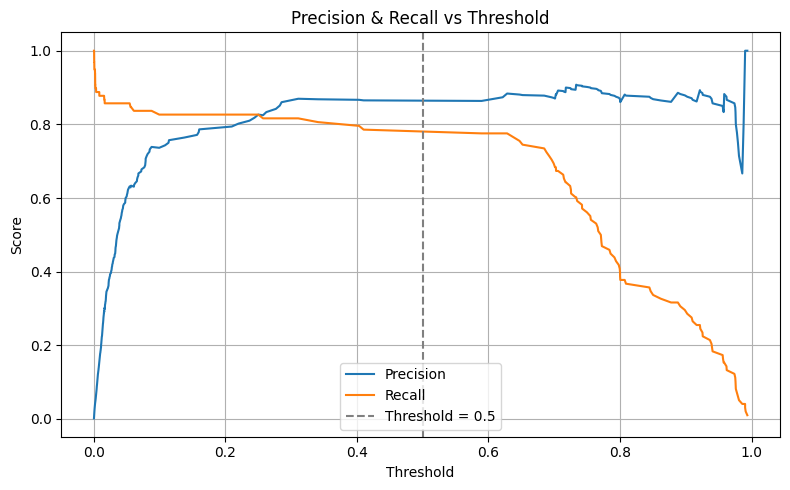

In [ ]:
model.eval()
X_test_tensor = torch.tensor(X_test, dtype=torch.float32).to(device)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).unsqueeze(1).to(device)

with torch.no_grad():
    y_scores = model(X_test_tensor)
    y_preds = (y_scores >= 0.5).float()

y_true = y_test_tensor.cpu().numpy()
y_scores = y_scores.cpu().numpy()
y_preds = y_preds.cpu().numpy()
precisions, recalls, thresholds = precision_recall_curve(y_true, y_scores)
print("\n=== Classification Report ===")
print(classification_report(y_true, y_preds, digits=4))
print("ROC-AUC:", roc_auc_score(y_true, y_scores))
plt.figure(figsize=(8, 5))
plt.plot(thresholds, precisions[:-1], label='Precision')
plt.plot(thresholds, recalls[:-1], label='Recall')
plt.axvline(x=0.5, linestyle='--', color='gray', label='Threshold = 0.5')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Precision & Recall vs Threshold')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

#### Performance
- Recall is similar to all model earlier
- But precision is less than XGBoost

              precision    recall  f1-score   support

         0.0     0.9997    0.9997    0.9997     56864
         1.0     0.8247    0.8163    0.8205        98

    accuracy                         0.9994     56962
   macro avg     0.9122    0.9080    0.9101     56962
weighted avg     0.9994    0.9994    0.9994     56962

ROC-AUC: 0.989432358480815


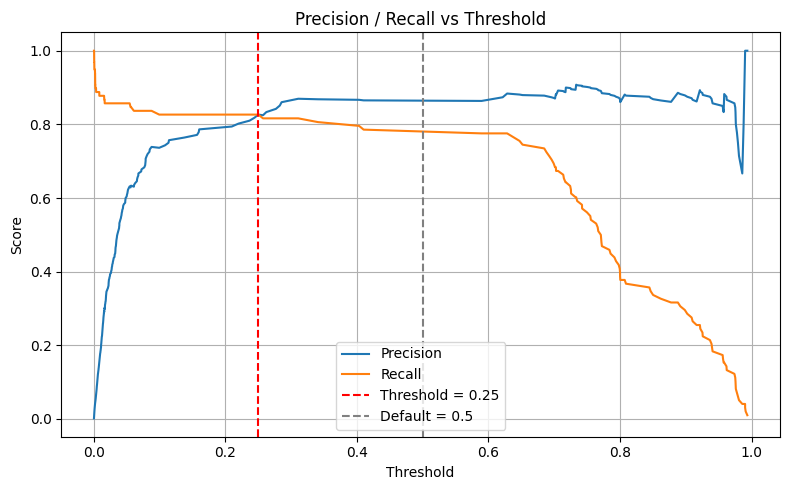

In [ ]:
threshold = 0.25
y_preds_new = (y_scores >= threshold).astype(int)
precisions, recalls, thresholds = precision_recall_curve(y_true, y_scores)
print(classification_report(y_true, y_preds_new, digits=4))
print("ROC-AUC:", roc_auc_score(y_true, y_scores))
plt.figure(figsize=(8, 5))
plt.plot(thresholds, precisions[:-1], label='Precision')
plt.plot(thresholds, recalls[:-1], label='Recall')
plt.axvline(x=threshold, color='red', linestyle='--', label=f'Threshold = {threshold}')
plt.axvline(x=0.5, color='gray', linestyle='--', label='Default = 0.5')
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.title("Precision / Recall vs Threshold")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

#### Plot losses
- This show each epoch decrease loss which reflex how good of model

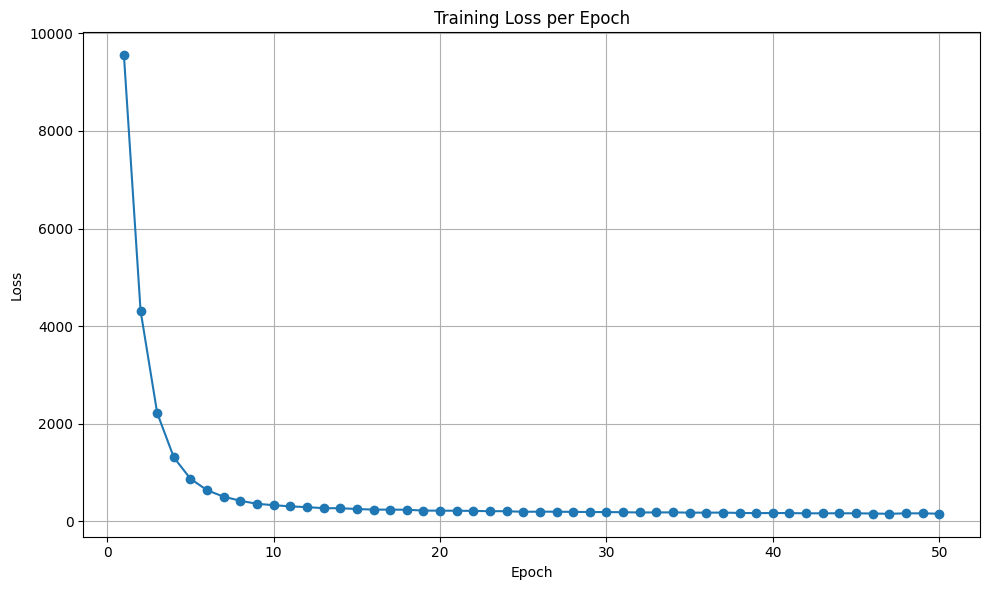

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(losses) + 1), losses, marker='o')
plt.title("Training Loss per Epoch")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid(True)
plt.tight_layout()
plt.show()

### 5.5 ROC-AUC
- This tell us is model classify well enough? 
- More than 90% is great!

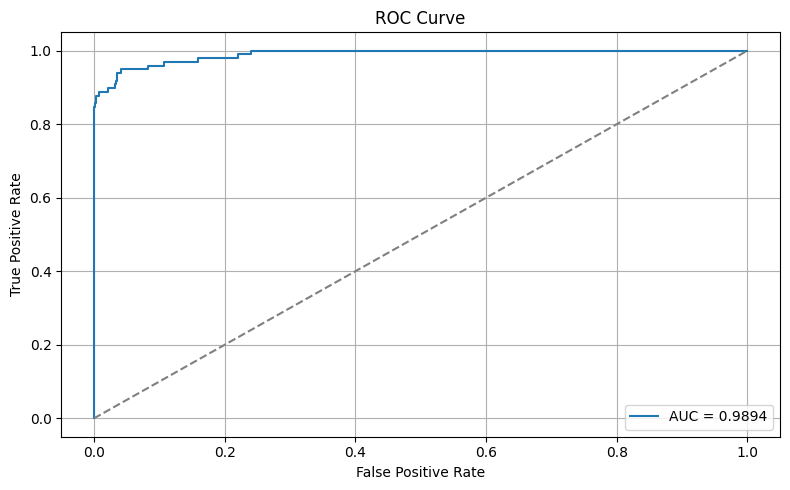

In [ ]:
fpr, tpr, _ = roc_curve(y_true, y_scores)
roc_auc = roc_auc_score(y_true, y_scores)
plt.figure(figsize=(8, 5))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.4f}")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### 5.5 Confusion Matrix
- 56,847 (True Negative) The model predicted that it was not a fraud and it was not = Correct
- 17 (False Positive) The model predicted that it was a fraud but it was not = Costing time
- 18 (False Negative) The model predicted that it was not a fraud but it was actually a fraud = Very risky
- 80 (True Positive) The model predicted that it was a fraud and it was = Our goal!

<Figure size 600x500 with 0 Axes>

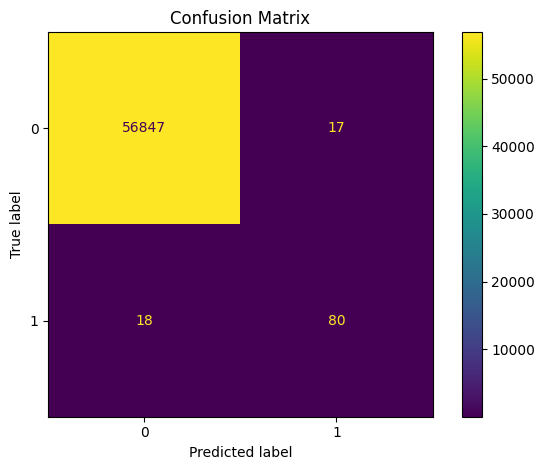

In [ ]:
cm = confusion_matrix(y_true, y_preds_new)
plt.figure(figsize=(6, 5))
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()

### 5.6 Recall Precision
- Recall = how many theives we caught
- Precision = how many thieves we have caught are actually thieves
- We catch 82.65% of theives
- Model: Caught theives 81.63%, Predict theives correct 82.47% 

In [ ]:
print(classification_report(y_true, y_preds_new, digits=4))

              precision    recall  f1-score   support

         0.0     0.9997    0.9997    0.9997     56864
         1.0     0.8247    0.8163    0.8205        98

    accuracy                         0.9994     56962
   macro avg     0.9122    0.9080    0.9101     56962
weighted avg     0.9994    0.9994    0.9994     56962



## 6. Chosen Model: XGBoost

### 6.1 Modeling
- Best Recall & Precision is XGBoost 
- So I use all data & best parameter to train model
- This help model has more data & great parameter to use in real world

In [ ]:
smote = SMOTE(sampling_strategy=0.005, random_state=77)
X_resampled, y_resampled = smote.fit_resample(X, y)

xgb = XGBClassifier(
    use_label_encoder=False,
    eval_metric='logloss',
    colsample_bytree=1.0,
    learning_rate=0.1,
    max_depth=5,
    n_estimators=300,
    subsample=1.0,
    random_state=77
)

xgb.fit(X_resampled, y_resampled)

c:\Users\User\Desktop\Git-Github\.venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:55:19] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=1.0, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=None,
              num_parallel_tree=None, ...)

- Dowload model for local deployment
- We can test our model before deploy real production

In [ ]:
with open("xgb_deploy.pkl", "wb") as f:
    pickle.dump(xgb, f)

In [ ]:
feature_names = df.drop('Class', axis=1).columns
print(feature_names)

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'scaled_Hour',
       'scaled_Amount'],
      dtype='object')


## Conclusion
1. From 3 models, the best to catch thieves is **XGBoost**, showing the highest precision-recall.
2. The model was trained using **SMOTE (0.005)** to address class imbalance, improving recall for fraud detection.
3. **Threshold = 0.2** was selected to balance precision and recall, favoring detection sensitivity.
4. The model has been deployed locally using **Flask** for testing.
5. For real-world use, further steps should include:
    - Deployment on cloud
    - Periodic retraining with new data
    - Logging and monitoring prediction confidence